<a href="https://colab.research.google.com/github/le-patrice/ANN/blob/main/tensorflow_basics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 0: Setup & Imports

In [2]:
# Step 0: Setup & Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Data Loading & Preporcessing
- Load dataset
- Normalize / reshape data
- Split into train/validation/test

---



---



In [3]:
# Step 1: Loading & preprocessing data
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize to [0,1]
x_train, x_test = x_train.astype("float32")/255.0, x_test.astype("float32")/255.0

# Add channel dimension (needed for ConvNets)
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)


print("Training shape:", x_train.shape, "Test Shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28, 1) Test Shape: (10000, 28, 28, 1)


### Step 2: Model Architecture
- start with Sequential API
- Move later to Functional API for flexibility
- Follow best practices(Dropout,  BatchNorm)

In [4]:
# Step 2: Define Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 3: Compile the Model
- Choose optimizer, loss, metrics

In [6]:
# Step 3: Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

### Step 4: Train the Model
- Use valiation split or test set
- Add callbacks (Early Stopping, Checkpoints)

In [7]:
# Step 4: Train model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=.1,
    verbose=2
    )

Epoch 1/5
844/844 - 9s - 11ms/step - accuracy: 0.9316 - loss: 0.2303 - val_accuracy: 0.9823 - val_loss: 0.0642
Epoch 2/5
844/844 - 2s - 3ms/step - accuracy: 0.9744 - loss: 0.0855 - val_accuracy: 0.9872 - val_loss: 0.0495
Epoch 3/5
844/844 - 2s - 3ms/step - accuracy: 0.9816 - loss: 0.0596 - val_accuracy: 0.9858 - val_loss: 0.0471
Epoch 4/5
844/844 - 3s - 3ms/step - accuracy: 0.9853 - loss: 0.0464 - val_accuracy: 0.9868 - val_loss: 0.0468
Epoch 5/5
844/844 - 3s - 3ms/step - accuracy: 0.9880 - loss: 0.0369 - val_accuracy: 0.9888 - val_loss: 0.0406


### Step 5: Evaluate & Visualize
- Test Performance
- Plot accuracy/loss curves

Test accuracy: 0.9873999953269958


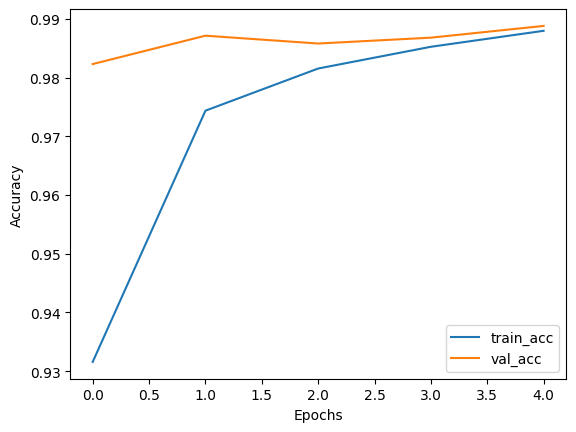

In [9]:
# Step 5: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

# Plot training history
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Step 6: Save Model
- Save model for reuse or deployment

In [10]:
model.save("mnsit_cnn_model.h5")